# Regresión lineal con mínimos cuadrados sobre datos reales


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datos de GPAs de alumnos de licenciatura


Variable | Descripción
--|--
high_GPA | High school grade point average
math_SAT | Math SAT score
verb_SAT | Verbal SAT score
comp_GPA | Computer science grade point average
univ_GPA | Overall university grade point average

https://onlinestatbook.com/2/case_studies/sat.html


Puede ser empleado DataFrame vía Pandas

In [19]:
sat = pd.read_csv("http://onlinestatbook.com/2/case_studies/data/sat.txt", sep=' ')
sat.head(10)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
5,2.10,562,486,2.64,2.37
6,2.82,573,548,2.86,2.40
7,2.36,559,536,2.03,2.24
8,2.42,552,583,2.81,3.02
9,3.51,617,591,3.41,3.32


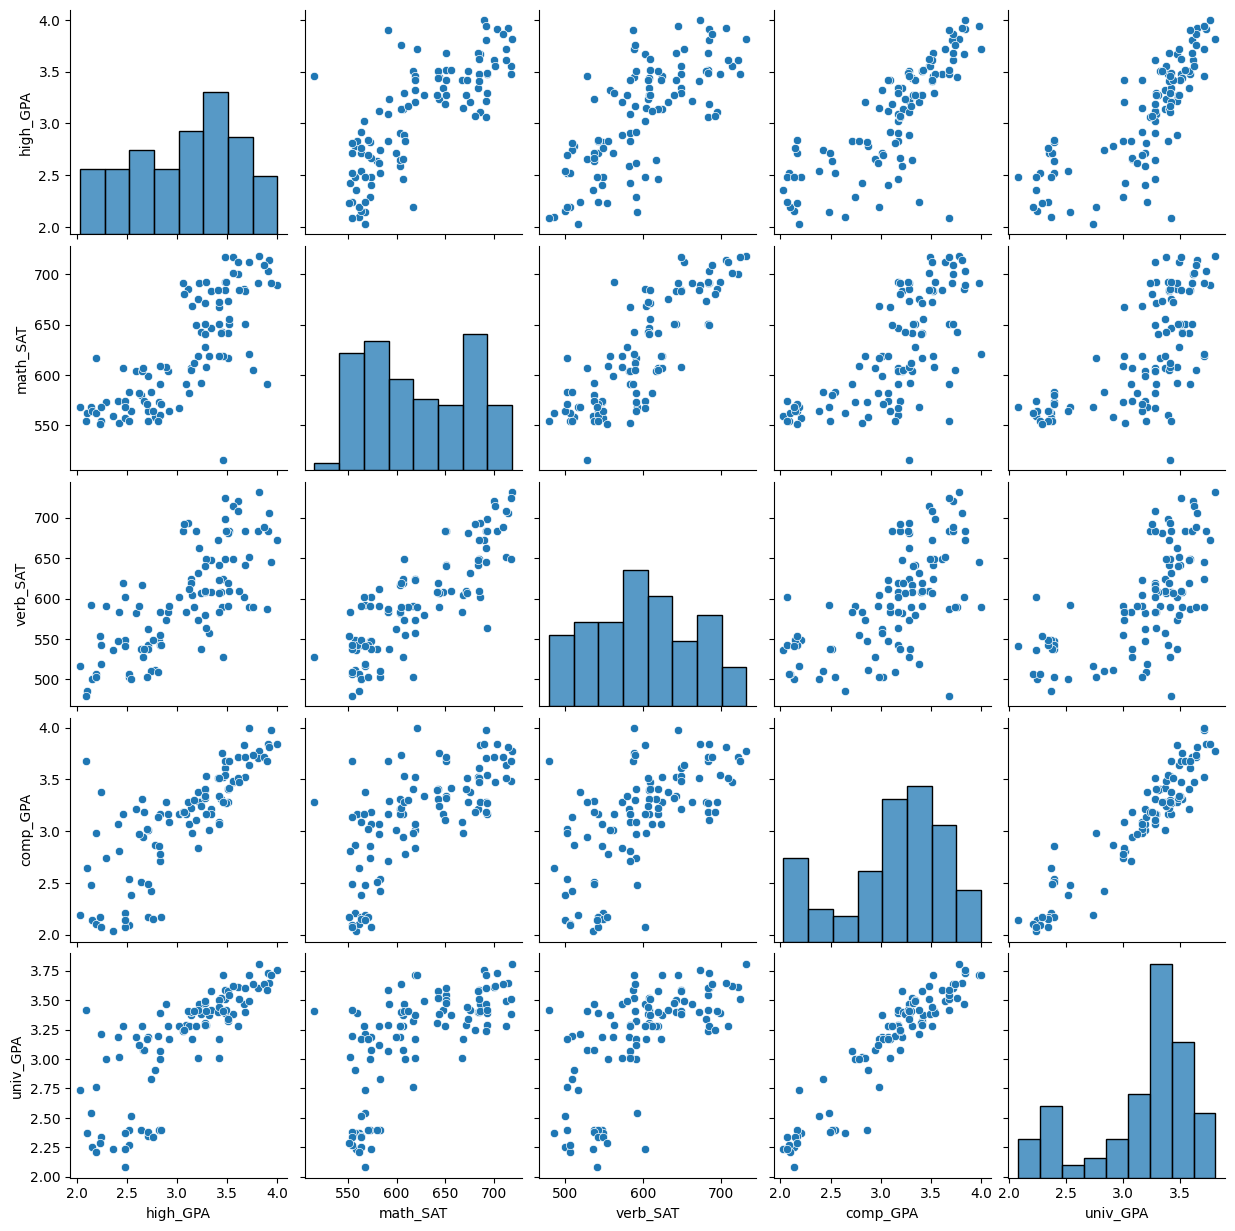

In [20]:
sns.pairplot(sat)
plt.show()

Empleamos el atributo Computer Science GPA (columna `comp_GPA`) como regresor para el University GPA (columna `univ_GPA`)


In [21]:
# Definir las variables independientes (regresoras) y la variable dependiente
X = sat['comp_GPA'].values  # Computer Science GPA
y = sat['univ_GPA'].values  # University GPA

Generamos conjunto de entrenamiento y validación

In [22]:
from sklearn.model_selection import train_test_split
X = sat[['high_GPA', 'math_SAT', 'verb_SAT', 'comp_GPA']]
y = sat['univ_GPA']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

Definimos la función de costo, basado en el error cuadrático medio:

$$
E(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^n (f_{\boldsymbol{\theta}}(\mathbf{x}'^{(i)}) - y^{(i)})^2
$$

In [23]:
sse = lambda y_t, y_p: ((y_t - y_p)**2).mean()

Estimamos los parámetros por mínimos cuadrados
$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [24]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(theta)

0    0.043476
1    0.000424
2    0.000962
3    0.702912
dtype: float64


Realizamos predicciones en conjunto de prueba

In [29]:
X_val_np = X_val.values

predictions = X_val_np @ theta
print(predictions)

[3.58491561 3.16426137 3.88227721 2.62045634 3.03320043 3.16833515
 3.18263629 2.94743993 3.60308124 3.63211525 2.31873616 3.72435614
 2.86918611 2.39846069 3.05379961 3.22193672 2.96610216 3.81256565
 3.1848581  2.64249262 2.37325802]


Cálculamos el error cuadrático medio entre los valores reales y los valores predichos

In [30]:
ECM = sse(y_val, predictions)
print(ECM)

0.02532944106106531


¿Se pueden usar los puntajes SAT de matemáticas y verbales para predecir el GPA universitario? ¿Están relacionados los GPA de la escuela secundaria y la universidad?

In [31]:
# Calcular el coeficiente de correlación entre high_GPA y univ_GPA
correlation = sat['high_GPA'].corr(sat['univ_GPA'])

# Imprimir el coeficiente de correlación
print("Correlación entre high_GPA y univ_GPA:", correlation)

Correlación entre high_GPA y univ_GPA: 0.7795631205489154


**Sí están relacionados...**